<a href="https://colab.research.google.com/github/asujin/Text-mining-project/blob/main/SImodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [137]:
!pip install kaggle

In [174]:
pip install dash==1.18.1

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 3.5MB 40.2MB/s 
     |████████████████████████████████| 194kB 32.1MB/s 
     |████████████████████████████████| 1.8MB 45.8MB/s 
     |████████████████████████████████| 358kB 34.0MB/s 
  Created wheel for dash: filename=dash-1.18.1-cp36-none-any.whl size=83681 sha256=69e33df46d0eb57ce5f37c1e0ec3c7035c1ec8e5eaa943d21f329e2e6a35c693
  Stored in directory: /root/.cache/pip/wheels/eb/56/fb/79b2169ce9fcb79753ec57a16abb8f0b7750b4c63d7eb3cea9
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-cp36-none-any.whl size=1013945 sha256=d174c9e7e41c085fef491d94331cd6f1b60ecc881f9cad69da678ef7a53d975b
  Stored in directory: /root/.cache/pip/wheels/cf/2b/5f/0928a6d1b7ebf280f21a2e925f36d662e6ba83e00b82c6b6bf
  Created wheel for dash-core-components: filename=dash_core_components-1.14.1-cp36-none-any.whl size=3525927 sha256=5b9565c202452a894e290

In [138]:
!pip install chart_studio

In [139]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"sujiniiiii","key":"2a1b8d46a4b54ddfa40708c2be113d66"}'}

In [140]:
ls -1ha kaggle.json

kaggle.json


In [110]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# 새 섹션

In [111]:
!kaggle datasets download -d kimjihoo/coronavirusdataset

coronavirusdataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
!ls

 Case.csv		  kaggle.json	    SeoulFloating.csv
 coronavirusdataset.zip   PatientInfo.csv   TimeAge.csv
'kaggle (1).json'	  Policy.csv	    Time.csv
'kaggle (2).json'	  Region.csv	    TimeGender.csv
'kaggle (3).json'	  sample_data	    TimeProvince.csv
'kaggle (4).json'	  SearchTrend.csv   Weather.csv


In [113]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
replace Case.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [176]:
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import chart_studio
import plotly.graph_objects as go
import plotly.express as px
import dash
import dash_core_components as doc
import dash_html_components as html

In [115]:
from sklearn import datasets
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import iplot, init_notebook_mode

In [116]:
Case=pd.read_csv("Case.csv")
Patient=pd.read_csv("PatientInfo.csv")
Policy=pd.read_csv("Policy.csv")           
SearchTrend=pd.read_csv("SearchTrend.csv")         
SeoulFloating=pd.read_csv("SeoulFloating.csv")       
Time=pd.read_csv("Time.csv")                
TimeAge=pd.read_csv("TimeAge.csv")             
TimeGender=pd.read_csv("TimeGender.csv")          
TimeProvince=pd.read_csv("TimeProvince.csv")        
TimeProvince=pd.read_csv("Weather.csv")  

In [117]:
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


In [118]:
Time['date']=pd.to_datetime(Time['date'])
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       163 non-null    datetime64[ns]
 1   time       163 non-null    int64         
 2   test       163 non-null    int64         
 3   negative   163 non-null    int64         
 4   confirmed  163 non-null    int64         
 5   released   163 non-null    int64         
 6   deceased   163 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 9.0 KB


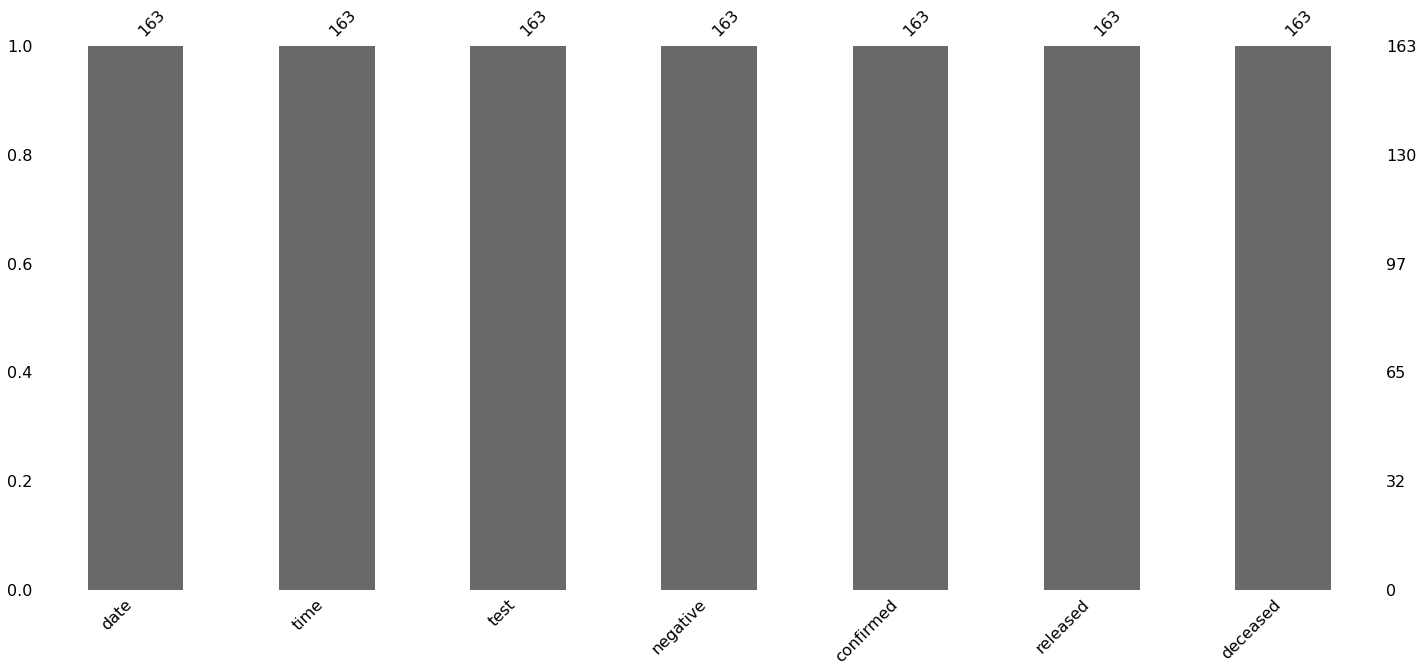

In [119]:
msno.bar(Time)

In [120]:
Time.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,date,time,test,negative,confirmed,released,deceased
count,163,163.000000,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000
unique,163,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-01-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.122699,4.977797e+05,4.754839e+05,7834.865031,5604.312883,157.104294
std,NaN,7.019174,3.958830e+05,3.865611e+05,4666.040541,4544.317229,114.010916
min,NaN,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,NaN,0.000000,9.648800e+04,5.877400e+04,3443.000000,29.000000,17.500000


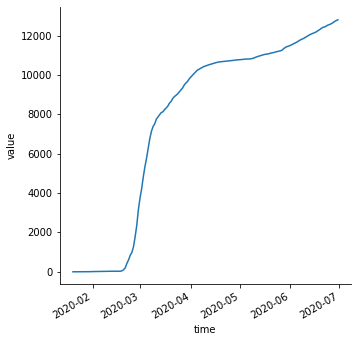

In [121]:
timegraph=pd.DataFrame(dict(time=Time['date'], value=Time['confirmed']))
g=sns.relplot(x="time", y="value", kind="line", data=timegraph)
g.fig.autofmt_xdate()

In [122]:
#B<k>를 상수로 두고 풀어보자.
index=list(range(0,len(Time['date'])))
N=51640000
first=1
confirmed=Time['confirmed']
i_value=[]
for i in index:
  i_value.append(confirmed[i]/N)
i_value=np.array(i_value)
i_initial=i_value[0]
ln_i_value=[]
for i in index:
  ln_i_value.append(math.log(i_value[i]/(1-i_value[i])))
ln_first_value=ln_i_value[0]
Beta=[]
Beta.append(0.0)
for i in range(1,len(i_value)):
  Beta.append((ln_i_value[i]-ln_first_value)/index[i])
print(Beta)
len(Beta)
Beta=np.array(Beta)
#1,2,3,4번까지 기울기는 0, 그 이후로 부터 기울기 증가.


[0.0, 0.0, 0.0, 0.0, 0.17328679998119423, 0.1386294399849554, 0.18310205456629625, 0.1980420598877706, 0.17328680240179928, 0.1540327132460438, 0.1791759566052228, 0.21799049694970243, 0.20707557190009954, 0.2083115747853784, 0.1934321765864228, 0.18483926751415528, 0.1806482554436496, 0.18444086129150492, 0.1765585708744012, 0.1672660145125906, 0.16479186847450675, 0.1569446366423874, 0.15146386513753873, 0.1448784796967762, 0.13884187637607717, 0.13328820132103408, 0.12816173203945586, 0.12471468045192469, 0.12147135511580334, 0.11841337191139065, 0.13106088669888283, 0.14981912560391117, 0.16619137265353784, 0.18396200283774844, 0.1882432083424024, 0.19214427868109674, 0.19123626534164487, 0.1929644523230603, 0.19675017264946684, 0.19888893773881774, 0.20138046783851946, 0.20063032023460697, 0.19870891480700367, 0.1971851452476794, 0.19501896304570615, 0.19244101161549854, 0.1901279060006264, 0.18765838653791833, 0.18484928135040282, 0.1817743433804944, 0.17849071223165067, 0.175612

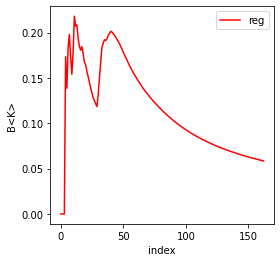

In [124]:
#plt.scatter(index,confirmed,label="real")
#Beta의 min,max 찾아내기=> index 알아내기=> 라벨 붙여보기
plt.plot(index, Beta, c="r", label='reg')
plt.legend()
plt.xlabel("index")
plt.ylabel("B<K>")
plt.rcParams["figure.figsize"] = (4, 4)

In [179]:
fig2=go.Figure(data=go.Bar(name='confirmed',x=Time['date'], y=Time['confirmed']))
fig2.update_layout(title_text='confirmed')
fig2.show()
app=dash.Dash()
app.layout= html.Div([doc.Graph(figure=fig2)])

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [170]:
fig=go.Figure(data=go.Bar(x=Time['date'],y=Beta))
fig.update_layout(title_text='Beta')
fig.show()
#01-27 "주의=> 경계"격상
#01-31 지역사회 전파 확산 차단 계획
#02-04 후베이성 방문 모든 외국인의 입국 제한
#02-05 보건용 마스크  및 손소독제 매점매석 행위 금지 및 단속 시행
#02-19 대구 집단 감염 발생
#02-20 지역사회 전파 대응 지침 개정 시행
#02-23 감염병 위기 경보 '심각'단계로 격상
#02-24 유,초,중,고 신학기 개학 연기
#02-26 1차 국민안심병원 지정/ 마스크 수출 제한 조치 및 공적 판매처 출고 의무화
#02-27 어린이집 휴원(~3.8)
#03-01 코로나 19지역 확산 대응 치료체계 재구축 방안=> 확진환자 중증도 분류하여 시행
#03-04 자동차 이동형 선별 진료소 운영지침 마련
#03-15 대구, 경북, 경산, 청도 , 봉화 특별재난지역 선포
#03-22 15일간 강도 높은 사회적 거리두기 시행
#03-29 전세계 모든 나라 입국자 2주간 자가격리 실시
#04-06 코로나 19' 강화된 사회적 거리두기 지속' (~4.19)
#07-01 전자출입명부 고위험 시설 의무 적용

In [135]:
new_val=[]
for i in index:
  new_val.append(math.exp(Beta[i]*index[i]))
i_formula=[]
for i in index:
  i_formula.append(i_initial*new_val[i]/((1-i_initial)+(i_initial*new_val[i])))
#print(i_formula)
i_formula=np.array(i_formula)
predict_confirm=(i_formula*N)
#print(predict_confirm)




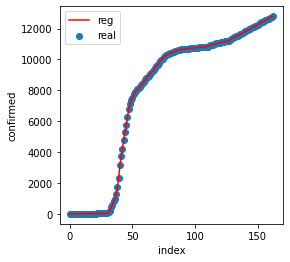

In [128]:
# Beta가 고정된 값이 아닐 경우
plt.scatter(index,confirmed,label="real")
plt.plot(index, predict_confirm, c="r", label='reg')
plt.legend()
plt.xlabel("index")
plt.ylabel("confirmed")
#axes = plt.axes()
#axes.set_xlim([0,100])
#axes.set_ylim(0,10000)
plt.show()


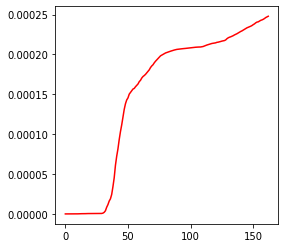

In [129]:
#Beta를 고정된 값이 아닐 때 i값
plt.plot(index, i_value, c="r", label='reg')

In [136]:
mean_Beta=np.mean(Beta)
print(mean_Beta-0.06)
new_val=[]
for i in index:
  new_val.append(math.exp((mean_Beta-0.06)*index[i]))
i_formula=[]
for i in index:
  i_formula.append(i_initial*new_val[i]/((1-i_initial)+(i_initial*new_val[i])))
#print(i_formula)
i_formula=np.array(i_formula)
predict_confirm=(i_formula*N)
#print(predict_confirm)


0.056559957837602606


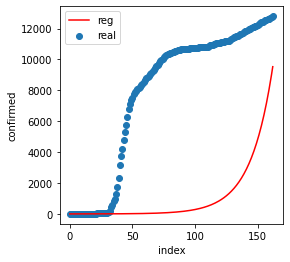

In [131]:
# Beta가 mean_beta로 고정
plt.scatter(index,confirmed,label="real")
plt.plot(index, predict_confirm, c="r", label='reg')
plt.legend()
plt.xlabel("index")
plt.ylabel("confirmed")
#axes = plt.axes()
#axes.set_xlim([0,100])
#axes.set_ylim(0,10000)
plt.show()


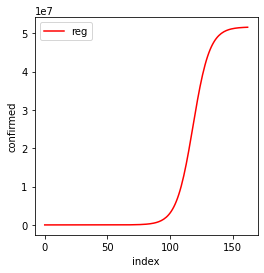

In [132]:
#mean_Beta는 0.116임
new_val=[]
for i in index:
  new_val.append(math.exp((0.15)*index[i]))
i_formula=[]
for i in index:
  i_formula.append(i_initial*new_val[i]/((1-i_initial)+(i_initial*new_val[i])))
#print(i_formula)
i_formula=np.array(i_formula)
predict_confirm=(i_formula*N)
#print(predict_confirm)

# Beta가 mean_beta로 고정
#plt.scatter(index,confirmed,label="real")
plt.plot(index, predict_confirm, c="r", label='reg')
plt.legend()
plt.xlabel("index")
plt.ylabel("confirmed")
#axes = plt.axes()
#axes.set_xlim([0,100])
#axes.set_ylim(0,10000)
plt.show()

#로지스틱모형이 나오려면 Beta값이 최소 0.15인것으로 추정


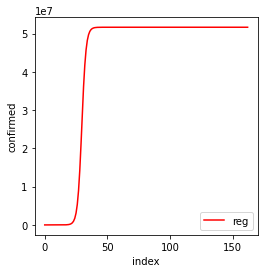

In [133]:
new_val=[]
for i in index:
  new_val.append(math.exp((0.6)*index[i]))
i_formula=[]
for i in index:
  i_formula.append(i_initial*new_val[i]/((1-i_initial)+(i_initial*new_val[i])))
#print(i_formula)
i_formula=np.array(i_formula)
predict_confirm=(i_formula*N)
#print(predict_confirm)

# Beta가 mean_beta로 고정
#plt.scatter(index,confirmed,label="real")
plt.plot(index, predict_confirm, c="r", label='reg')
plt.legend()
plt.xlabel("index")
plt.ylabel("confirmed")
#axes = plt.axes()
#axes.set_xlim([0,100])
#axes.set_ylim(0,10000)
plt.show()

#Beta가 클수록 초기에 기울기가 확 올라감
#Beta가 0.05정도이면 실제 값과 비슷하나 로지스틱모형과는 차별점이 있음
#Beta가 최소 0.15정도는 되야 로지스틱 모형이 나오나, 예측된 confirmed와 실제 confirmed사이에 큰 괴리가 있음
#Beta값이 고정되지 않았을 때가 실제 예측값과 가장 비슷하나 그렇다면 상수라고 가정한 Beta의 정의에서 어긋남. 


In [134]:
(1-i_initial)/i_initial

51639999.0